In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [16]:
df=pd.read_csv(r"advertising.csv")

In [17]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


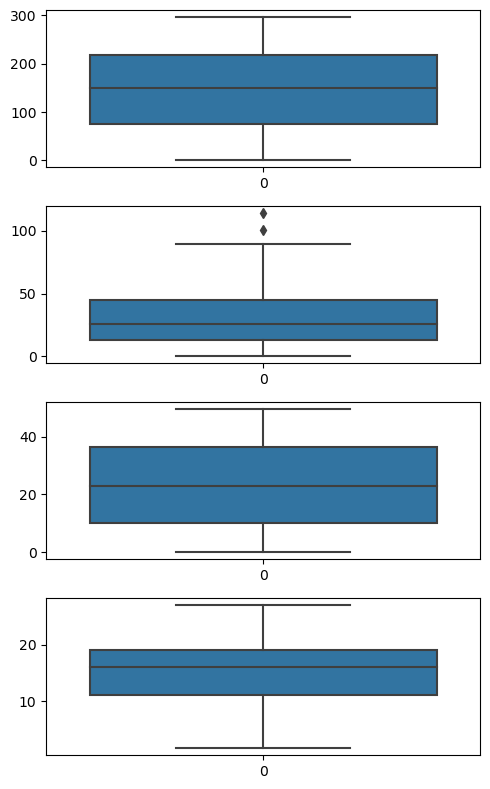

In [61]:
fig, axs = plt.subplots(4, figsize=(5, 8))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(df['Radio'], ax=axs[2])
plt4 = sns.boxplot(df['Sales'], ax=axs[3])
plt.tight_layout()

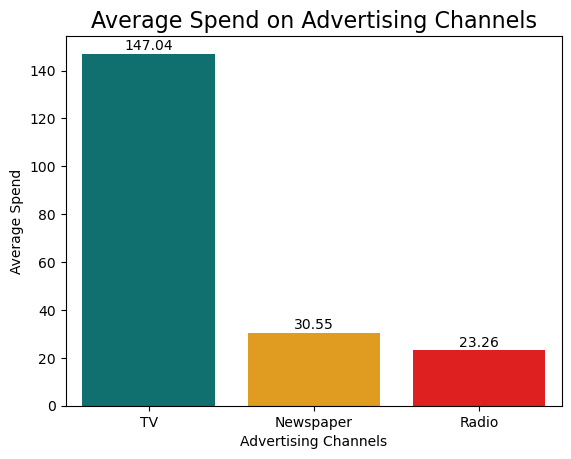

In [68]:
avg_spend = df[['TV','Newspaper','Radio']].mean()

colors = ['teal','orange','red']

ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette=colors, linewidth=0)

for i, v in enumerate(avg_spend.values):
    ax.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')


plt.title('Average Spend on Advertising Channels', fontsize=16)
plt.xlabel('Advertising Channels', fontsize=10)
plt.ylabel('Average Spend', fontsize=10)
ax.yaxis.grid(False)
plt.show()

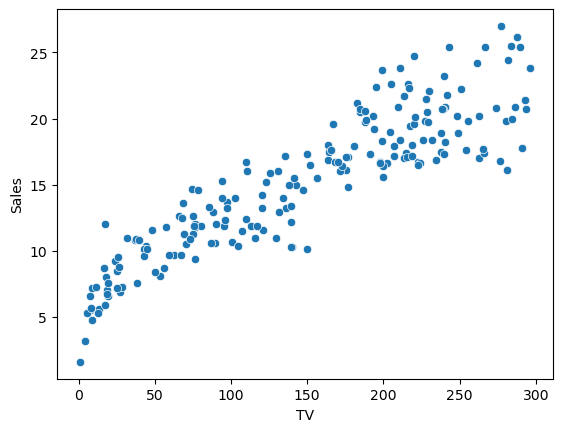

In [22]:
sns.scatterplot(x = df["TV"] , y=df["Sales"])
plt.show()

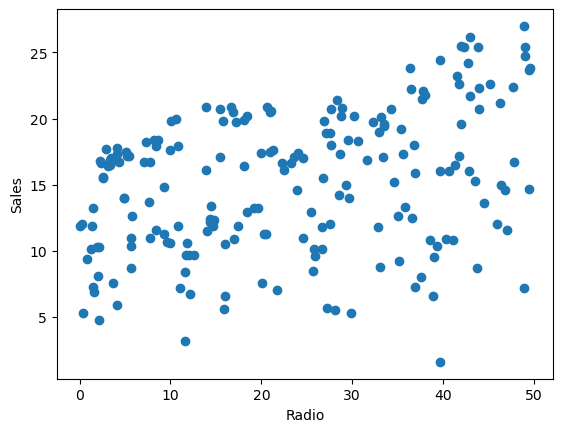

In [28]:
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

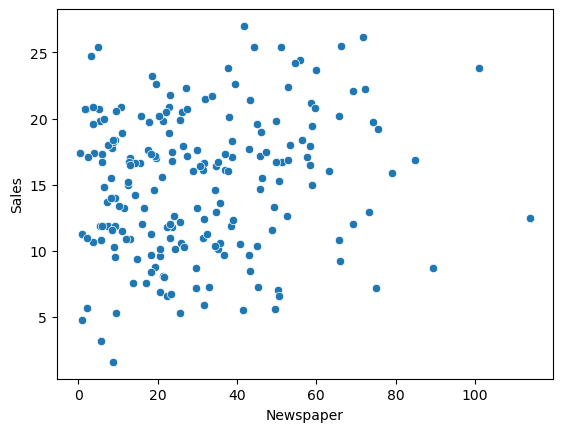

In [29]:
sns.scatterplot(x=df["Newspaper"],y=df["Sales"])
plt.show()

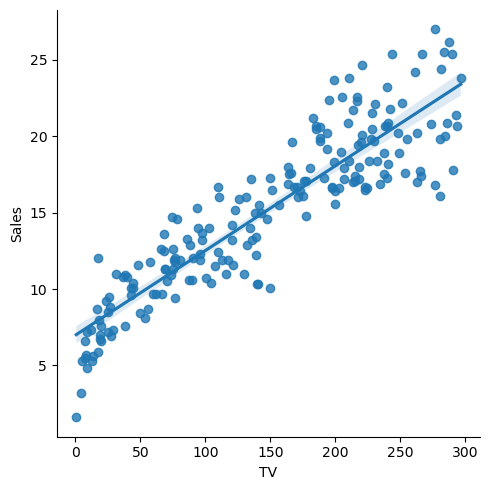

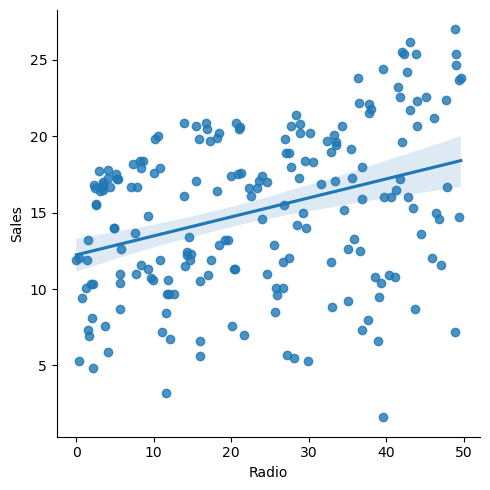

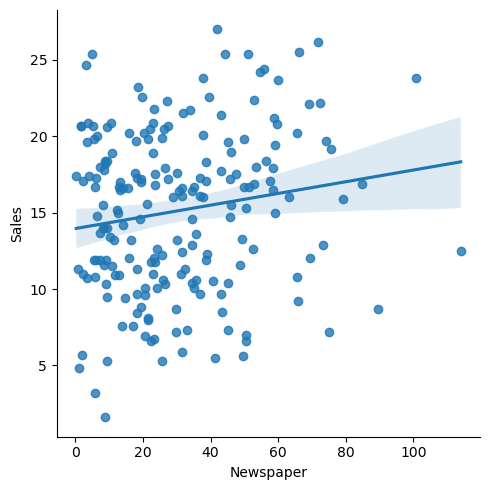

In [27]:
sns.lmplot(x="TV",y="Sales",data=df)
sns.lmplot(x="Radio",y="Sales",data=df)
sns.lmplot(x="Newspaper",y="Sales",data=df)

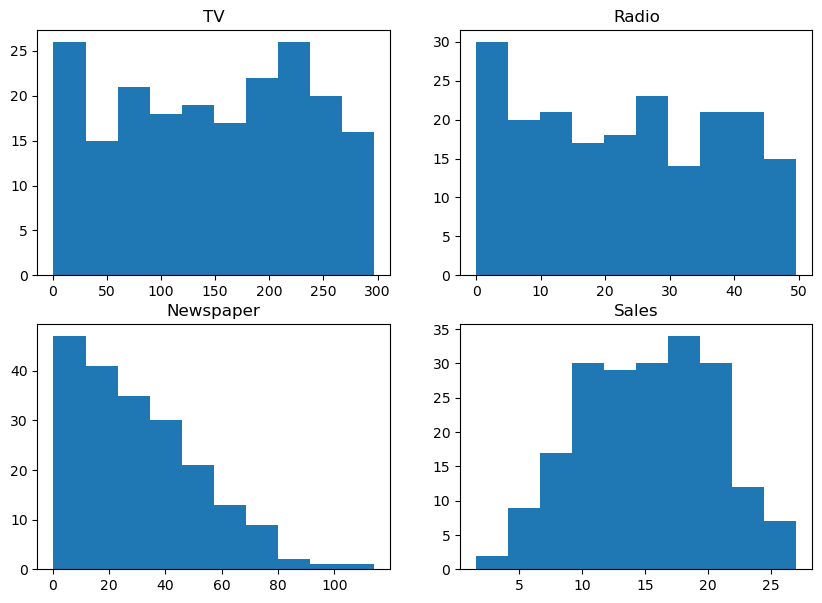

In [30]:
plt.figure(figsize=(10,7))

plt.subplot(221)
plt.hist(df['TV'])
plt.title('TV')

plt.subplot(222)
plt.hist(df['Radio'])
plt.title('Radio')

plt.subplot(223)
plt.hist(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(224)
plt.hist(df['Sales'])
plt.title('Sales')

plt.show()

In [69]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Text(0.5, 1.0, 'Correlation of advertising mediums with sales')

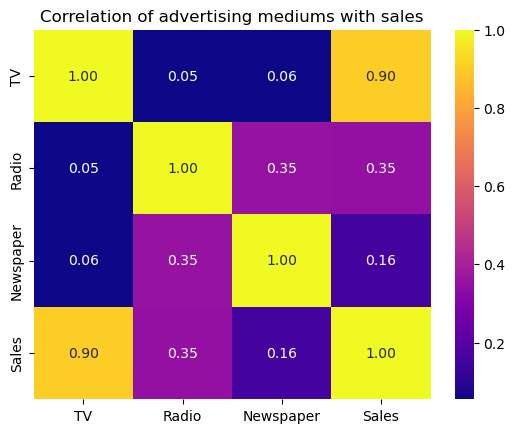

In [46]:
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap='plasma')
plt.title("Correlation of advertising mediums with sales")

In [74]:
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in TV column are: 190
No. of unique values in Radio column are: 167
No. of unique values in Newspaper column are: 172
No. of unique values in Sales column are: 121


In [73]:
x=df[['TV']]
y=df[['Sales']]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [34]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]
     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   

In [49]:
x1_test=sm.add_constant(x_test)
reg=sm.OLS(y_test,x1_test)
model=reg.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     158.8
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.84e-15
Time:                        17:56:49   Log-Likelihood:                -94.026
No. Observations:                  40   AIC:                             192.1
Df Residuals:                      38   BIC:                             195.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3754      0.747      8.533      0.0

In [50]:
residual=model.resid
residual

18     0.842124
170   -0.925177
107    0.291435
98     1.933783
177    0.283655
182   -0.990944
5      0.311306
146   -2.340078
12     1.420485
152   -1.432801
61     2.409234
125   -0.919781
180   -0.114017
154    3.145347
80     0.917362
7     -0.266608
33    -4.644444
130   -4.816736
37     3.917653
74    -1.964918
183    2.857672
145   -4.352402
45    -0.605419
159   -1.245048
60    -1.431659
123    1.562307
179    1.455031
185    4.130638
122   -2.990262
44     0.643792
16     2.124717
55     5.590506
150   -6.835264
111    1.165531
22    -1.554170
189   -0.778642
129   -0.191527
4      0.858311
83     3.189320
106   -0.650308
dtype: float64

In [35]:
ML = LinearRegression()
ML.fit(x_train,y_train)

LinearRegression()

In [36]:
x_train_prediction = ML.predict(x_train)
print(x_train_prediction)

[[ 9.1709017 ]
 [ 8.87695647]
 [14.94093769]
 [18.57170561]
 [18.88742456]
 [12.75267876]
 [ 7.63041096]
 [ 8.08221567]
 [14.0046677 ]
 [12.85610393]
 [13.1391623 ]
 [19.65494821]
 [20.97770175]
 [17.22717836]
 [ 9.59548926]
 [10.55353297]
 [23.10608294]
 [16.55219302]
 [18.18522207]
 [ 7.55964637]
 [21.59825279]
 [17.91849399]
 [19.0561709 ]
 [15.18044861]
 [16.48687185]
 [19.01262345]
 [21.46216703]
 [16.0622843 ]
 [12.62747986]
 [11.31561319]
 [17.22717836]
 [14.47280269]
 [22.06094435]
 [23.296603  ]
 [12.39885579]
 [13.1391623 ]
 [21.06479663]
 [18.27231695]
 [20.23195181]
 [17.70620021]
 [17.56467103]
 [12.04503283]
 [ 9.50295094]
 [ 9.24166629]
 [ 7.87536532]
 [20.18840437]
 [ 8.09854596]
 [18.63158334]
 [ 8.55579409]
 [16.79714737]
 [18.424733  ]
 [10.76038331]
 [15.31109094]
 [14.20607461]
 [12.28998719]
 [22.22424726]
 [22.23513412]
 [ 7.58686352]
 [20.81984227]
 [16.72638278]
 [ 7.7991573 ]
 [11.27206575]
 [18.03824945]
 [19.6876088 ]
 [13.00851997]
 [19.4535413 ]
 [16.05139

In [37]:
print(y_train)

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]


In [39]:
print(ML.coef_)
print(ML.intercept_)

[[0.0544343]]
[7.16227597]


In [40]:
x_test_prediction = ML.predict(x_test)
print(x_test_prediction)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


In [41]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2


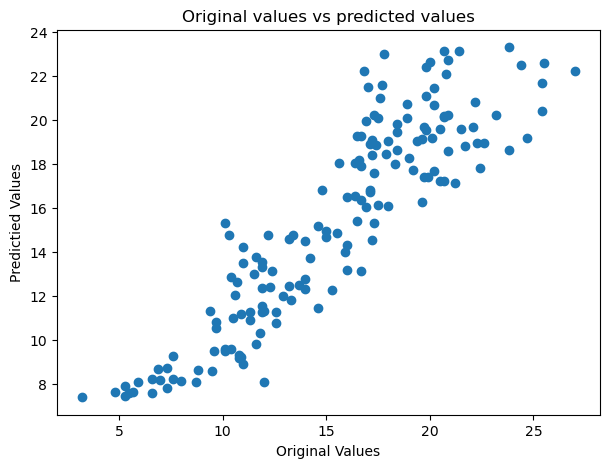

In [42]:
plt.figure(figsize=[7,5])
plt.scatter(y_train, x_train_prediction)
plt.xlabel("Original Values")
plt.ylabel("Predictied Values")
plt.title("Original values vs predicted values")
plt.show()


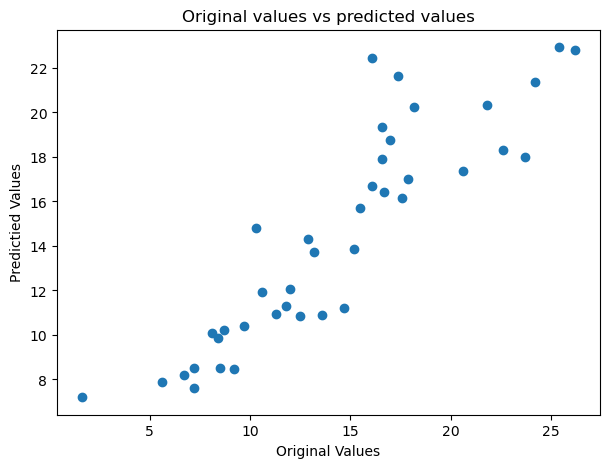

In [43]:
plt.figure(figsize=[7,5])
plt.scatter(y_test, x_test_prediction)
plt.xlabel("Original Values")
plt.ylabel("Predictied Values")
plt.title("Original values vs predicted values")
plt.show()

<Axes: ylabel='Count'>

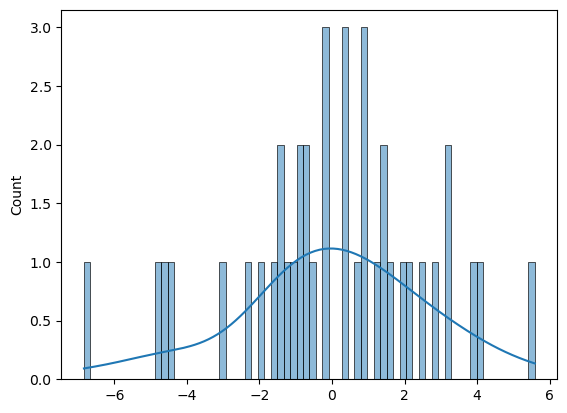

In [51]:
sns.histplot(residual,bins=70,kde=True)